<a href="https://colab.research.google.com/github/victorsamson191/HDSC-Introduction-to-Python-for-machine-learning/blob/master/Stage_B_questions_and_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import requests
from bs4 import BeautifulSoup 
from requests_futures.sessions import FuturesSession
from sklearn.linear_model import*
from sklearn import*
from sklearn.linear_model import LinearRegression

In [ ]:
# first I download the online file file as df_1 and check the description and th info

In [ ]:
df_1 = pd.read_csv('energydata_complete (1).csv')
df_1.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [ ]:
df_1.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
df_1.describe().head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889


In [ ]:
 df_1.describe().tail() 

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
min,10.0,0.0,16.79,27.023333,16.100000,20.463333,17.200,28.766667,15.100000,27.660000,...,14.89,29.166667,-5.000000,729.300000,24.000000,0.000000,1.0,-6.600000,0.005322,0.005322
25%,50.0,0.0,20.76,37.333333,18.790000,37.900000,20.790,36.900000,19.530000,35.530000,...,18.00,38.500000,3.666667,750.933333,70.333333,2.000000,29.0,0.900000,12.497889,12.497889
50%,60.0,0.0,21.60,39.656667,20.000000,40.500000,22.100,38.530000,20.666667,38.400000,...,19.39,40.900000,6.916667,756.100000,83.666667,3.666667,40.0,3.433333,24.897653,24.897653
75%,100.0,0.0,22.60,43.066667,21.500000,43.260000,23.290,41.760000,22.100000,42.156667,...,20.60,44.338095,10.408333,760.933333,91.666667,5.500000,40.0,6.566667,37.583769,37.583769
max,1080.0,70.0,26.26,63.360000,29.856667,56.026667,29.236,50.163333,26.200000,51.090000,...,24.50,53.326667,26.100000,772.300000,100.000000,14.000000,66.0,15.500000,49.996530,49.996530


In [ ]:
# I checked if the is any missing items in the file and there was non

In [ ]:
df_1.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
# form  the questions 10, I Dropped  date and lights

In [ ]:
df_1 = df_1.drop(columns=['date', 'lights'], axis = 1)
df_1

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [ ]:
# the columns has been reduce to 27 instead of 29
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   T1           19735 non-null  float64
 2   RH_1         19735 non-null  float64
 3   T2           19735 non-null  float64
 4   RH_2         19735 non-null  float64
 5   T3           19735 non-null  float64
 6   RH_3         19735 non-null  float64
 7   T4           19735 non-null  float64
 8   RH_4         19735 non-null  float64
 9   T5           19735 non-null  float64
 10  RH_5         19735 non-null  float64
 11  T6           19735 non-null  float64
 12  RH_6         19735 non-null  float64
 13  T7           19735 non-null  float64
 14  RH_7         19735 non-null  float64
 15  T8           19735 non-null  float64
 16  RH_8         19735 non-null  float64
 17  T9           19735 non-null  float64
 18  RH_9         19735 non-null  float64
 19  T_ou

In [ ]:
# I  brought out s sample of the dataset which is Appliance and T2
simple_linear_reg_df = df_1[['Appliances', 'T2']].sample(30, random_state = 2)
simple_linear_reg_df.head(3)

,Appliances,T2
1117,20,17.426667
16275,340,22.760000
13272,180,21.230000


In [ ]:
#Normalise the dataset to a common scale using the min max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalised_df = pd.DataFrame(scaler.fit_transform(df_1), columns = df_1.columns)
normalised_df.head(3), normalised_df.tail(3)


(   Appliances       T1      RH_1        T2      RH_2        T3      RH_3  \
 0    0.046729  0.32735  0.566187  0.225345  0.684038  0.215188  0.746066   
 1    0.046729  0.32735  0.541326  0.225345  0.682140  0.215188  0.748871   
 2    0.037383  0.32735  0.530502  0.225345  0.679445  0.215188  0.755569   
 
          T4      RH_4        T5  ...        T9      RH_9     T_out  \
 0  0.351351  0.764262  0.175506  ...  0.223032  0.677290  0.372990   
 1  0.351351  0.782437  0.175506  ...  0.226500  0.678532  0.369239   
 2  0.344745  0.778062  0.175506  ...  0.219563  0.676049  0.365488   
 
    Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
 0     0.097674  0.894737   0.500000    0.953846   0.538462  0.265449  0.265449  
 1     0.100000  0.894737   0.476190    0.894872   0.533937  0.372083  0.372083  
 2     0.102326  0.894737   0.452381    0.835897   0.529412  0.572848  0.572848  
 
 [3 rows x 27 columns],
        Appliances        T1      RH_1        T2  

In [ ]:
# QUESTIONS 12

In [ ]:
#select a sample of the dataset
reg_df = normalised_df[['T2', 'T6']]
reg_df.head()


,T2,T6
0,0.225345,0.381070
1,0.225345,0.375443
2,0.225345,0.367487
3,0.225345,0.363800
4,0.225345,0.361859


In [ ]:
# i have to reshape the values of T2 and T6
x1 = reg_df['T2'].values.reshape(-1, 1)
y1 = reg_df['T6'].values.reshape(-1, 1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 42)


# import LinearRegression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x1_train, y1_train)
y1_pred = linear_model.predict(x1_test)
y1_pred


array([[0.23928945],
       [0.46794238],
       [0.23108472],
       ...,
       [0.3001772 ],
       [0.4297256 ],
       [0.3217686 ]])

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y1_test, y1_pred)
print(' The R-Squared: {}'.format(round(r2, 2)))


R-Squared: 0.64


In [ ]:
# I decided to normalised the data set

In [ ]:
#The trageted varaibles is the Appliance so we must normalised the Appliance as y
# we must normalised the other columns as X(predictors)
X = normalised_df.drop(['Appliances'], axis = 1)
y = normalised_df['Appliances']

In [ ]:
# QUESTIONS 13

In [ ]:
#Normalise the dataset to a common scale using the min max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalised_df = pd.DataFrame(scaler.fit_transform(df_1), columns = df_1.columns)
normalised_df.head(3), normalised_df.tail(3)


In [ ]:
# split it into Test and train
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))


X_train shape: (13814, 26)
X_test shape: (5921, 26)
y_train shape: (13814,)
y_test shape: (5921,)


In [ ]:
# we must have a creat a linear regression before we calculate for the MAE
linear_model = LinearRegression()

In [ ]:

# I fit the model to the training dataset 
linear_model.fit(X_train, y_train) 
#obtain predictions 
predicted_values = linear_model.predict(X_test) 
S= predicted_values
S


array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [ ]:
#MAE 
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, S) #prints 0.063 round(mae, 3)
mae
print('The MEan Absolute Error is :{}'.format(mae))

The MEan Absolute Error is :0.05013362397742957


In [ ]:
# then get the intercept and the coefficeint
linear_model.intercept_

0.15290295882253058

In [ ]:
linear_model.coef_

array([-0.00328105,  0.5535466 , -0.23617792, -0.45669795,  0.29062714,
        0.09604827,  0.028981  ,  0.02638578, -0.01565684,  0.01600579,
        0.23642491,  0.03804865,  0.01031878, -0.04461364,  0.10199505,
       -0.15759548, -0.18994077, -0.03980032, -0.32185967,  0.00683933,
       -0.07767065,  0.02918313,  0.01230661,  0.11775773,  0.0007701 ,
        0.0007701 ])

In [ ]:
# QUESTIONS 14

In [ ]:
# to get the RSS

In [ ]:
import numpy as np 
y_pred = S
rss = np.sum(np.square(y_test - S)) 
rss = round(rss, 3) #prints 1.823
rss.round(2)
print('The RSS: {}'.format(rss.round(2)))

The RSS: 45.35


In [ ]:
# QUESTIONS 15

In [ ]:
# Root Mean Square Error 

In [ ]:
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error: {}'.format(round(rmse, 3)))


Root Mean Squared Error: 0.088


In [ ]:
#QUESTIONS 16

In [ ]:
# Coefficient of Determination
from sklearn.metrics import r2_score 
r2_score = r2_score(y_test, S) 
r2_score=round(r2_score, 2) 
r2_score.round(5)
Coefficient_of_Determination = r2_score.round(5)
print(': {}' .format(Coefficient_of_Determination))

Coefficient_of_Determination: 0.15


Training score: 0.145
Testing score: 0.149


In [ ]:
# QUESTIONS 17

In [ ]:
#To Create the weight of the Features

In [ ]:
# triaing and test score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print('Training score: {:.3f}'.format(train_score))
print('Testing score: {:.3f}'.format(test_score))


Training score: 0.145
Testing score: 0.149


In [ ]:

#comparing the effects of regularisation 
def get_weights_df(model, feat, col_name): 
    #this function returns the weight of every feature 
    weights = pd.Series(model.coef_, feat.columns).sort_values() 
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name] 
    weights_df[col_name].round(3) 
    return weights_df
linear_model_weights = get_weights_df(linear_model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight') 
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.401134,-0.000000
1,T_out,-0.321860,-0.250765,0.000000
2,T2,-0.236178,-0.193880,0.000000
3,T9,-0.189941,-0.188584,-0.000000
4,RH_8,-0.157595,-0.156596,-0.000110
5,RH_out,-0.077671,-0.050541,-0.049557
6,RH_7,-0.044614,-0.046291,-0.000000
7,RH_9,-0.039800,-0.041701,-0.000000
8,T5,-0.015657,-0.020727,-0.000000
9,T1,-0.003281,-0.021549,0.000000


In [ ]:
WE = final_weights[['Features', 'Linear_Model_Weight']]
WE.head()

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595


In [ ]:
WE.min(), WE.max()

(Features               Press_mm_hg
 Linear_Model_Weight      -0.456698
 dtype: object,
 Features                    rv2
 Linear_Model_Weight    0.553547
 dtype: object)

In [ ]:
print(' the lowest and the highest weight is:{}'.format(A))

 the lowest and the highest weight is:(Features               Press_mm_hg
Linear_Model_Weight      -0.456698
dtype: object, Features                    rv2
Linear_Model_Weight    0.553547
dtype: object)


In [ ]:
# so EH_2 and RH_1 are the lowest and the highest weifhts

In [ ]:

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.coef_

array([-0.00328105,  0.5535466 , -0.23617792, -0.45669795,  0.29062714,
        0.09604827,  0.028981  ,  0.02638578, -0.01565684,  0.01600579,
        0.23642491,  0.03804865,  0.01031878, -0.04461364,  0.10199505,
       -0.15759548, -0.18994077, -0.03980032, -0.32185967,  0.00683933,
       -0.07767065,  0.02918313,  0.01230661,  0.11775773,  0.0007701 ,
        0.0007701 ])

<AxesSubplot:title={'center':'Linear Coefficients'}>

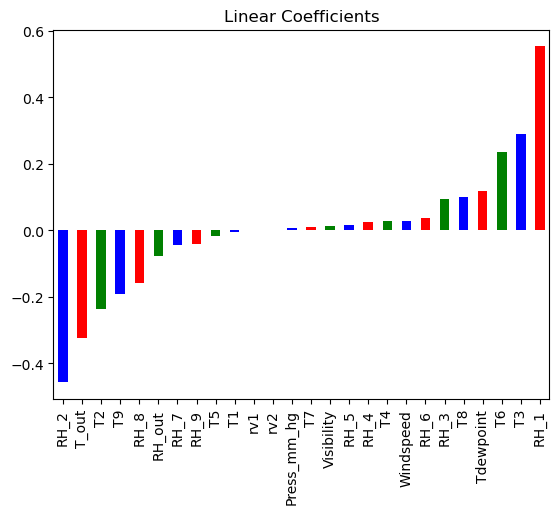

In [ ]:
# Regularization

predictors = X_train.columns

coef = pd.Series(regr.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Linear Coefficients', color = ['blue','red', 'green'])


In [ ]:
# I must  bring out  the Rigde(L2) and Lasso(L!) Regression

In [ ]:
#Ridge Regression 
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=0.5) 
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

Lasso(alpha=0.001)

In [ ]:
# triaing and test score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print('Training score: {:.3f}'.format(train_score))
print('Testing score: {:.3f}'.format(test_score))


Training score: 0.145
Testing score: 0.149


In [ ]:
# Questions 18
@ 

In [ ]:
# i must bring in the Rigde(L2) and Lasso(L!) Regression

In [ ]:
#Ridge Regression 
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=0.5) 
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
# Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha=0.001) 
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
#Ridege Regress
# performing ridge regression at alpha = 0.4

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.4)
ridge.fit(X_train, y_train)

# Obtain predictions
ridge_pred = ridge.predict(X_test)
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
print('Training score of ridge regression model: {:.3f}'.format(train_score))
print('Testing score of ridge regression model: {:.3f}'.format(test_score))


Training score of ridge regression model: 0.145
Testing score of ridge regression model: 0.149


In [ ]:
# Prediction with Ridge
R = ridge.predict(X_test)
# Mean Absolute Error with Ridge
from sklearn.metrics import mean_absolute_error
mae_R = mean_absolute_error(y_test, R)
print('Mean Absolute Error for Ridge model: {}'.format(round(mae_R, 2)))


Mean Absolute Error for Ridge model: 0.05


In [ ]:
#Residual Sum of Squares (RSS) for Ridge
rss_R = np.sum(np.square(y_test - R))
print('Residual sum of Squares for Ridge: {}'.format(round(rss_R, 2)))

Residual sum of Squares for Ridge: 45.37


In [ ]:
# Root Mean Squared Error (RMSE) for Ridge
from sklearn.metrics import mean_squared_error
mse_R = mean_squared_error(y_test, R)
rmse_R = np.sqrt(mse_R)
print('Root Mean Squared Error for Ridge model: {}'.format(round(rmse_R, 3)))

Root Mean Squared Error for Ridge model: 0.088


In [ ]:
# QUESTIONS 18
# THE ANSWER is  NO there is no difference  as the answers are below  as R and Q


In [ ]:
R =('Root Mean Squared Error for Ridge model: {}'.format(round(rmse_R, 3)))
R

'Root Mean Squared Error for Ridge model: 0.088'

In [ ]:
 Q = ('Root Mean Squared Error: {}'.format(round(rmse, 3)))
 Q

'Root Mean Squared Error: 0.088'

In [ ]:
# R_Squared (coefficient of determination)
from sklearn.metrics import r2_score
r_squared_R = r2_score(y_test, R)
print('R-Squared for Ridge model: {}'.format(round(r_squared_R, 2)))

R-Squared for Ridge model: 0.15


In [ ]:
#Lasso Regression(L1) 

In [ ]:
# Lasso model at alpha = 0.001

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)
lasso_reg_pred = lasso_reg.predict(X_test)
lasso_reg.coef_


array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00011004, -0.        , -0.        ,  0.        , -0.        ,
       -0.04955749,  0.00291176,  0.        ,  0.        , -0.        ,
       -0.        ])

In [ ]:
# QUESTIONS 19

In [ ]:
# do the traine and test score to get the number of features of training
train_score = lasso_reg.score(X_train, y_train)
test_score = lasso_reg.score(X_test, y_test)

print('Training score of Lasso regression model: {:.3f}'.format(train_score))
print('Testing score of Lasso regression model: {:.3f}'.format(test_score))
print('Number of features for training: {:.3f}'.format(np.sum(lasso_reg.coef_ != 0)))


Training score of Lasso regression model: 0.025
Testing score of Lasso regression model: 0.027
Number of features for training: 4.000


In [ ]:
# THE Number of features for training:
print('Number of features for training: {:.3f}'.format(np.sum(lasso_reg.coef_ != 0)))


Number of features for training: 4.000


In [ ]:
# get the MAE
#prediction with Lasso
L = lasso_reg.predict(X_test)
# Mean Absolute Error with Lasso
from sklearn.metrics import mean_absolute_error
mae_L = mean_absolute_error(y_test, L)
print('Mean Absolute Error for Lasso model: {}'.format(round(mae_L, 2)))


Mean Absolute Error for Lasso model: 0.06


In [ ]:
# Residual Sum of Squares (RSS) for Lasso
rss_L = np.sum(np.square(y_test - L))
print('Residual Sum of Squares for Lasso: {}'.format(round(rss_L, 2)))


Residual Sum of Squares for Lasso: 51.85


In [ ]:
# QUESTIONS 20

In [ ]:
# Root Mean Squared Error (RMSE) for Lasso model
from sklearn.metrics import mean_squared_error
mse_L = mean_squared_error(y_test, L)
rmse_L = np.sqrt(mse_L)
print('Root Mean Squared Error for Lasso model: {}'.format(round(rmse_L, 3)))

Root Mean Squared Error for Lasso model: 0.094
